In [1]:
!git clone https://github.com/aycakrk/DI725_Ayca.git

Cloning into 'DI725_Ayca'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 90 (delta 17), reused 86 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (90/90), 1.68 MiB | 5.52 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [2]:
import pandas as pd

# Dosyaları yükle
train_df = pd.read_csv('/content/DI725_Ayca/assignment_1/data/customer_service/train.csv')
test_df = pd.read_csv('/content/DI725_Ayca/assignment_1/data/customer_service/test.csv')

# İlk birkaç satırı görüntüle
print("Train Data:")
print(train_df.head())

print('-----------------------')

print("\nTest Data:")
print(test_df.head())

print('-----------------------------------------------------------------------------------')

# Sütun isimlerini kontrol et
print("\nTrain Data Column Names:", train_df.columns)
print('-----------------------')
print("Test Data Column Names:", test_df.columns)

# Basic info about dataset
print("\nTraining Dataset Info:")
print(train_df.info())

print("\nTest Dataset Info:")
print(test_df.info())

Train Data:
                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Re

In [7]:
# Eğitim ve test veri setlerindeki toplam satır sayısını kontrol et
print(f"Total rows in training data: {len(train_df)}")
print(f"Total rows in test data: {len(test_df)}")


Total rows in training data: 970
Total rows in test data: 30


In [3]:
print("Missing Values of Train Data:")
print(train_df.isnull().sum())

print("\nMissing Values of Test Data:")
print(test_df.isnull().sum())

# Analyzing the sentiment distribution
print("\nSentiment Distribution in Training Data:")
print(train_df['customer_sentiment'].value_counts(normalize=True))



Missing Values of Train Data:
issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

Missing Values of Test Data:
issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

Sentiment Distribution in Training Data:
customer_sentiment
neutral     0.558763
negative    0.423711
positive    0.017526
Name: proportion, dtype: float64


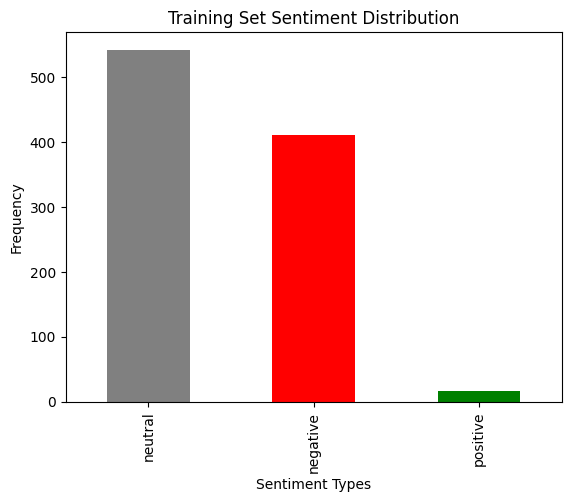

In [5]:
import matplotlib.pyplot as plt

# Sentiment distribution in the training set
train_df['customer_sentiment'].value_counts().plot(kind='bar', color=['gray', 'red', 'green'])
plt.title('Training Set Sentiment Distribution')
plt.xlabel('Sentiment Types')
plt.ylabel('Frequency')
plt.show()


Step 3: Text Data Insights
To further understand the text data, we'll look into the length of the conversations and any notable patterns or anomalies in the text content.


Summary Statistics for Conversation Lengths:
count     970.000000
mean     2129.284536
std       564.751035
min        46.000000
25%      1760.250000
50%      2058.500000
75%      2430.000000
max      5708.000000
Name: text_length, dtype: float64


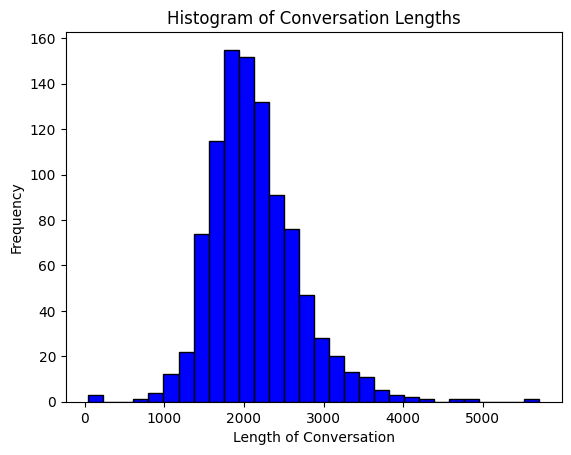

In [6]:
# Adding a new column for text length for analysis
train_df['text_length'] = train_df['conversation'].apply(len)

# Summary statistics for text length
print("\nSummary Statistics for Conversation Lengths:")
print(train_df['text_length'].describe())

# Histogram to visualize the distribution of conversation lengths
plt.hist(train_df['text_length'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Conversation Lengths')
plt.xlabel('Length of Conversation')
plt.ylabel('Frequency')
plt.show()


In [19]:
import pandas as pd
import re

def clean_text(text):
    # Convert text to lowercase for uniformity
    text = text.lower()

    # Retain letters, spaces, periods, question marks, exclamation marks, and colons
    text = re.sub(r'[^a-z\s:.!?]', '', text)

    # Remove unnecessary spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Load the datasets
train_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/train.csv'
test_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/test.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Apply the cleaning function to the conversation column in both datasets
train_df['cleaned_conversation'] = train_df['conversation'].apply(clean_text)
test_df['cleaned_conversation'] = test_df['conversation'].apply(clean_text)

# Display some of the cleaned data to ensure it's processed as expected
print("Cleaned Training Data:")
print(train_df['cleaned_conversation'].head())
print("\nCleaned Test Data:")
print(test_df['cleaned_conversation'].head())



Cleaned Training Data:
0    agent: thank you for calling brownbox customer...
1    agent: thank you for calling brownbox customer...
2    agent: thank you for calling brownbox customer...
3    customer: hi i am facing an issue while loggin...
4    agent: thank you for contacting brownbox custo...
Name: cleaned_conversation, dtype: object

Cleaned Test Data:
0    agent: thank you for calling brownbox customer...
1    agent: thank you for calling brownbox customer...
2    agent: thank you for calling brownbox customer...
3    agent: thank you for calling brownbox customer...
4    agent: thank you for calling brownbox customer...
Name: cleaned_conversation, dtype: object


In [20]:
# Specify the paths where you want to save the cleaned data
cleaned_train_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/cleaned_train.csv'
cleaned_test_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/cleaned_test.csv'

# Save the cleaned dataframes to CSV files
train_df.to_csv(cleaned_train_data_path, index=False)
test_df.to_csv(cleaned_test_data_path, index=False)

print("Cleaned training data saved to:", cleaned_train_data_path)
print("Cleaned test data saved to:", cleaned_test_data_path)


Cleaned training data saved to: /content/DI725_Ayca/assignment_1/data/customer_service/cleaned_train.csv
Cleaned test data saved to: /content/DI725_Ayca/assignment_1/data/customer_service/cleaned_test.csv


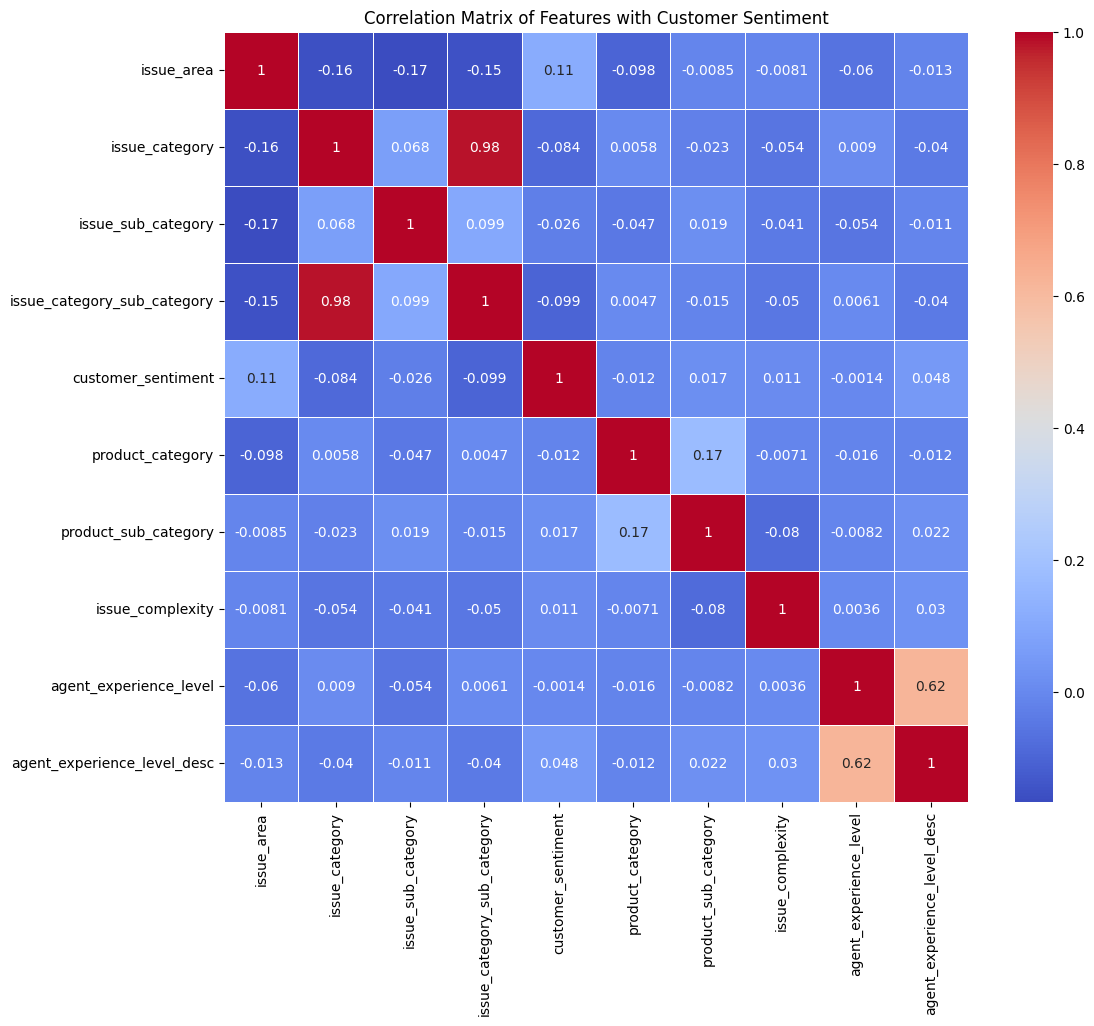

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('/content/DI725_Ayca/assignment_1/data/customer_service/train.csv')

# Kategorik sütunları belirle
categorical_columns = [
    'issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category',
    'product_category', 'product_sub_category',
    'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc'
]

# Kategorik sütunları Label Encode et
label_encoders = {}
for col in categorical_columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col].astype(str))
        label_encoders[col] = le

# Duygu etiketlerini encode et (Positive, Neutral, Negative -> 2, 1, 0)
label_mapping = {"positive": 2, "neutral": 1, "negative": 0}
train_df['customer_sentiment'] = train_df['customer_sentiment'].map(label_mapping)

# 'conversation' sütununu korelasyon matrisinden çıkart
numeric_df = train_df.drop(['conversation'], axis=1)

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Features with Customer Sentiment")
plt.show()


In [21]:
# Veri tipi kontrolü
print(train_df.dtypes)


issue_area                     object
issue_category                 object
issue_sub_category             object
issue_category_sub_category    object
customer_sentiment             object
product_category               object
product_sub_category           object
issue_complexity               object
agent_experience_level         object
agent_experience_level_desc    object
conversation                   object
cleaned_conversation           object
dtype: object


In [35]:
!python /content/DI725_Ayca/assignment_1/data/customer_service/prepare.py


Original: Test encoding and decoding!
Encoded: [53, 70, 84, 85, 1, 70, 79, 68, 80, 69, 74, 79, 72, 1, 66, 79, 69, 1, 69, 70, 68, 80, 69, 74, 79, 72, 2]
Decoded: Test encoding and decoding!


In [37]:
import numpy as np
import pickle
import os

# Define the function to load the .bin files
def load_bin_file(file_path):
    data = []
    with open(file_path, 'rb') as f:
        while True:
            try:
                # Read the length of the next conversation
                length_array = np.fromfile(f, dtype=np.uint16, count=1)
                if len(length_array) == 0:
                    break  # End of file
                length = length_array[0]

                # Read the actual conversation
                conversation = np.fromfile(f, dtype=np.uint16, count=length)
                if len(conversation) < length:
                    break  # Prevent incomplete read
                data.append(conversation.tolist())
            except Exception as e:
                print(f"Error while reading file: {e}")
                break
    return data



# Define the function to load labels
def load_labels(file_path):
    return np.fromfile(file_path, dtype=np.uint16).tolist()

# Define the function to load metadata
def load_meta(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# Define file paths
output_dir = '/content/DI725_Ayca/assignment_1/data/customer_service/'
train_data_path = os.path.join(output_dir, 'train_data.bin')
val_data_path = os.path.join(output_dir, 'val_data.bin')
test_data_path = os.path.join(output_dir, 'test_data.bin')
train_labels_path = os.path.join(output_dir, 'train_labels.bin')
val_labels_path = os.path.join(output_dir, 'val_labels.bin')
test_labels_path = os.path.join(output_dir, 'test_labels.bin')
meta_path = os.path.join(output_dir, 'meta.pkl')

# Load metadata to get vocab_size
meta = load_meta(meta_path)
vocab_size = meta['vocab_size']
itos = meta['itos']
stoi = meta['stoi']

# Load data using the loader function
train_data = load_bin_file(train_data_path)
val_data = load_bin_file(val_data_path)
test_data = load_bin_file(test_data_path)

train_labels = load_labels(train_labels_path)
val_labels = load_labels(val_labels_path)
test_labels = load_labels(test_labels_path)

# Print to check if counts match
print(f"Number of training samples: {len(train_data)}")
print(f"Number of validation samples: {len(val_data)}")
print(f"Number of test samples: {len(test_data)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of validation labels: {len(val_labels)}")
print(f"Number of test labels: {len(test_labels)}")


# Example of decoding a sample conversation
def decode(ids, itos):
    try:
        return ''.join([itos[i] for i in ids if i in itos])
    except Exception as e:
        print(f"Decoding Error: {e}")
        return ""


# Check one of the loaded conversations
sample_conversation = train_data[0]
decoded_sample = decode(sample_conversation, itos)
print("Decoded Sample Conversation:\n", decoded_sample)


Number of training samples: 873
Number of validation samples: 97
Number of test samples: 30
Number of training labels: 873
Number of validation labels: 97
Number of test labels: 30
Decoded Sample Conversation:
 hi i need to return a sweatshirt that i received yesterday. the courier executive was extremely rude and unprofessional and i dont want to deal with them again. agent: hi there im sorry to hear that you had a negative experience with our courier executive. ill be happy to assist you with your return. can you please provide me with your order number and the reason for the return? sure my order number is bb and i want to return the sweatshirt because it doesnt fit me properly. agent: thank you for providing that information. let me check your account and see what i can do for you. agent puts the customer on hold for a minute agent: thank you for holding. i have checked your account and i can see that youre eligible for a return and refund. you dont need to worry about the courier 

In [34]:
# Check the type of keys in itos
print(type(list(itos.keys())[0]))  # This should print <class 'int'>


<class 'int'>


In [ ]:
%cd /content/DI725_Assignment_1
!git add .
!git commit -m "Data Exploration and Pre-processing Phase2"
!git push https://8fba86c0f329fbc1f4ceb7d9337681c478af8566@github.com/aycakrk/DI725_Assignment_1.git

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
!cp /content/drive/MyDrive/Colab Notebooks /content/DI725_Ayca/assignment_1

cp: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
cp: cannot stat 'Notebooks/DataExploration.ipynb': No such file or directory
